<a href="https://colab.research.google.com/github/sahoopuspanjali/PracticalMachineLearning/blob/master/HW1_CustomeModelTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

In [0]:
import pandas as pd
import numpy as np

1.Import boston dataset from keras
2.devide the data in Train / Test split- print the shape

In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(f'Training data shape : {X_train.shape}')
print(f'Testing data shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

Training data shape : (404, 13)
Testing data shape : (102, 13)
y_train shape : (404,)
y_test shape : (102,)


3.Explore data - print it

In [0]:
print(X_train)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [0]:
print(y_train)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [0]:
print(f'Training data shape : {X_train.shape}')
print(f'Testing data shape : {X_test.shape}')
print(f'Training sample : {X_train[0]}')
print(f'Testing sample : {X_test[0]}')


Training data shape : (404, 13)
Testing data shape : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Testing sample : [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]


4.Normalize the X values using sklearn

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
min_max_scaler = MinMaxScaler()
X_train_scale = min_max_scaler.fit_transform(X_train)
print(X_train_scale)

[[1.37816304e-02 0.00000000e+00 2.81524927e-01 ... 8.93617021e-01
  1.00000000e+00 4.68818985e-01]
 [1.73654275e-04 8.25000000e-01 5.75513196e-02 ... 2.23404255e-01
  9.96167230e-01 3.80794702e-02]
 [5.49837765e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.46089061e-01 4.22185430e-02]
 ...
 [3.18534767e-04 3.50000000e-01 2.05278592e-01 ... 4.57446809e-01
  9.12627969e-01 1.68322296e-01]
 [2.40852297e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.59715568e-01 3.87969095e-01]
 [9.07048543e-05 6.00000000e-01 9.05425220e-02 ... 3.19148936e-01
  9.49064501e-01 7.31236203e-02]]


In [0]:
print(X_train_scale[0])

[0.01378163 0.         0.28152493 0.         0.31481481 0.49980635
 0.91452111 0.29719123 0.13043478 0.22753346 0.89361702 1.
 0.46881898]


In [0]:
X_test_scale = min_max_scaler.fit_transform(X_test)
print(X_test_scale[0])

[0.72190697 0.         0.63650075 0.         0.59916493 0.39846154
 1.         0.0346309  1.         0.91412214 0.87804878 0.00698455
 0.90222813]


In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Configuring the Model

In [0]:
inputs = keras.Input(shape=(13,))
x = keras.layers.Dense(32, activation='relu')(inputs)
y = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(y)
model1 = keras.Model(inputs, outputs)

In [0]:
model1.compile(loss='mse',optimizer='adam')
h1 = model1.fit(X_train_scale, y_train,batch_size=64, epochs=50,validation_data=(X_test_scale, y_test) )

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s 2ms/sample - loss: 567.9714 - val_loss: 595.3701
Epoch 2/50
404/404 [==============================] - 0s 101us/sample - loss: 565.2249 - val_loss: 592.4893
Epoch 3/50
404/404 [==============================] - 0s 98us/sample - loss: 562.5291 - val_loss: 589.6736
Epoch 4/50
404/404 [==============================] - 0s 107us/sample - loss: 559.7320 - val_loss: 586.7731
Epoch 5/50
404/404 [==============================] - 0s 107us/sample - loss: 556.8720 - val_loss: 583.8334
Epoch 6/50
404/404 [==============================] - 0s 108us/sample - loss: 554.0053 - val_loss: 580.9863
Epoch 7/50
404/404 [==============================] - 0s 115us/sample - loss: 551.3487 - val_loss: 578.4484
Epoch 8/50
404/404 [==============================] - 0s 105us/sample - loss: 549.0583 - val_loss: 576.3598
Epoch 9/50
404/404 [==============================] - 0s 103us/sample - loss: 547.1739 - val_

5.Create custom activation function


In [0]:
def my_sigmoid(x):
    return (tf.sigmoid(x) * 5) - 1

def my_relu(z): # return value is just max of 0 and z
    return tf.maximum(0.,z)


6.Create custom initializer 

In [0]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

Building model with custom activation function and Custom initializer

In [0]:
inputs = keras.Input(shape=(13,))
x = keras.layers.Dense(32, activation=my_relu, 
                           kernel_initializer=my_glorot_initializer)(inputs)
y = keras.layers.Dense(32, activation=my_relu,
                           kernel_initializer=my_glorot_initializer)(x)
outputs = keras.layers.Dense(1, activation=my_sigmoid)(y)

model = keras.Model(inputs, outputs)

7.Create custom loss

In [0]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.9
    return tf.where(is_small_error, squared_loss, linear_loss)

8.Train your model using your custom functions

In [0]:
model.compile(loss=huber_fn, optimizer="nadam")
h = model.fit(X_train_scale, y_train,batch_size=64, epochs=50, validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 1s 3ms/sample - loss: 19.3627 - val_loss: 20.8148
Epoch 2/50
323/323 [==============================] - 0s 101us/sample - loss: 19.1657 - val_loss: 20.6002
Epoch 3/50
323/323 [==============================] - 0s 81us/sample - loss: 18.9287 - val_loss: 20.3300
Epoch 4/50
323/323 [==============================] - 0s 91us/sample - loss: 18.6387 - val_loss: 20.0188
Epoch 5/50
323/323 [==============================] - 0s 88us/sample - loss: 18.3193 - val_loss: 19.6999
Epoch 6/50
323/323 [==============================] - 0s 94us/sample - loss: 18.0110 - val_loss: 19.4236
Epoch 7/50
323/323 [==============================] - 0s 88us/sample - loss: 17.7594 - val_loss: 19.2206
Epoch 8/50
323/323 [==============================] - 0s 91us/sample - loss: 17.5820 - val_loss: 19.0793
Epoch 9/50
323/323 [==============================] - 0s 95us/sample - loss: 17.4611 - val_loss: 18.9876
Epoch 10/5

9.Visualize the history of your training

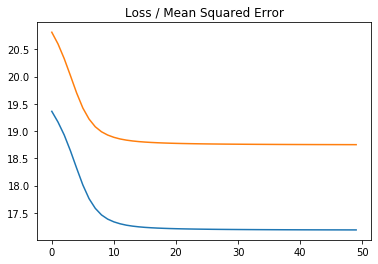

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss / Mean Squared Error')
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()